## tinyFrame Analysis - General Calculations

## Purpose
This document serve as the repository for all analysis for the tinyFrame project.

In [1]:
import numpy, yaml, pint
import numpy as np
import matplotlib.pyplot as plt

# Boilerplate
## Initialize Pint Registry for Unit Manipulation
## See documentation on Registries and Units in Pint here:
## https://pint.readthedocs.io/en/stable/getting/tutorial.html
from pint import UnitRegistry
ureg = UnitRegistry(auto_reduce_dimensions=True)

In [2]:
preferred_units = [
   ureg.m,  # distance      L
   ureg.kilogram,  # mass          M
   ureg.s,  # duration      T
   ureg.c,  # temperature   Θ
   ureg.newton,  # force         L M T^-2
   ureg.W,  # power         L^2 M T^-3
]

In [3]:
# Maximum Weight of Parts
W_p = 15 * ureg.lbf

# Densities

# Density of Media
rho_m = 90 * ureg.lbf / (ureg.ft*ureg.ft*ureg.ft)
# Density of Aluminum
rho_al = 2.7 * ureg.g / (ureg.cm*ureg.cm*ureg.cm)
# Density of Stainless Steel
rho_as = 7.85 * ureg.g / (ureg.cm*ureg.cm*ureg.cm)

# Length of Barrel, L_b, that can contain Media
L_b = 273 * ureg.mm

# Tw = Torque Generated by Weight
# Ta = Torque Remaining for Acceleration
# e = weight eccentricity
# D = diameter of the Barrel
D = 200 * ureg.mm
e = D/4

# Motor Variable Declarations
# Rated Motor Speed - No Load
w_m = 10 * ureg.rpm
# Rated Motor Torque
T_m = 192 * ureg.kgf * ureg.cm
print(f"Motor Torque Value in Nm: {T_m.to(ureg.newton * ureg.meter):.2f}")
print(T_m.to(ureg.newton*ureg.m))

# Gear Declarations

# Number of Teeth on Bull Gear
N_b = 1
# Number of Teeth on Pinion
N_p = 1

# Volume of Assembly (Aluminum parts that are rotating)
V_aa = 46000 * ureg.mm**3
# Volume of Assembly (Steel parts that are rotating)
V_as = 0 * ureg.mm**3

# Weight of the Assembly
W_a =  (V_as * rho_as + V_aa * rho_al )* 9.81 * (ureg.m / ureg.s**2)

# Mass of the media in worst case
Vm_wc = 3.14 * (D/2)**2 * L_b / 2

# Weight of the media
W_m = Vm_wc * rho_m

# Speed of Assembly (reduced through gears)
speedAssembly =  (N_p/N_b) * w_m

# Torque Generated by the Media, Parts & Assembly
T_w = e * (W_m + W_p + W_a)

# WC power required for system
# Torque (N.m) x Speed (RPM)
P_sys = T_w * speedAssembly

# Factor of Safety against Torque
FOSTorqueMotor = T_m / T_w

print("weight of WC media")
print(W_m.to(ureg.lbf))

print("Torque generated by WC media + parts")
print(T_w.to(ureg.newton * ureg.m))

print("Power required of System")
print(P_sys.to(ureg.watt))

print("FOS against Motor Torque")
#print(FOSTorqueMotor)
print(f"{FOSTorqueMotor.magnitude:.2f}")


Motor Torque Value in Nm: 18.83 meter * newton
18.828768 meter * newton
weight of WC media
13.622597373147508 force_pound
Torque generated by WC media + parts
6.426902916006658 meter * newton
Power required of System
6.730236995420445 watt
FOS against Motor Torque
2.93


# Plotting of Torque over rotation for Drum

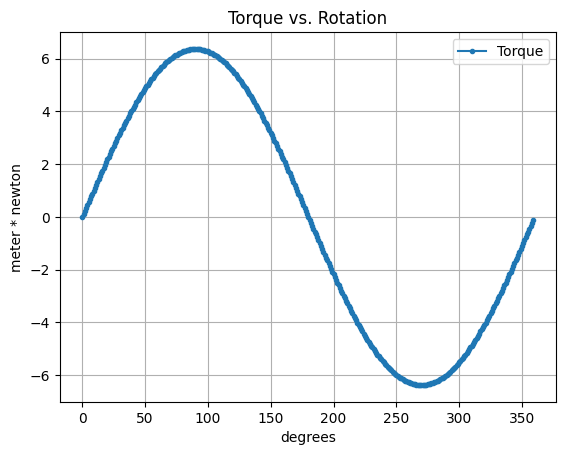

In [4]:
# Step 1: Define your X and Y values in lists
# For this example, let's use some sample data

# Initialize empty lists to store X (rotation) and Y (torque) values
x_values = []  # Rotation (X)
y_values = []  # Torque (Y)

for x in range(0, 360):  # This gives X values: 0, 1, 2, ..., 10
    e_fn = np.sin(np.radians(x))*e
    
    y = e_fn * (W_m + W_p)
    x_values.append(x)  # Append X value to the list
    x_label = 'degrees'
 
    y_values.append(y.to(ureg.newton * ureg.meter).magnitude) 
    y_label = str(y.to(ureg.newton * ureg.meter).units)



# Step 2: Create the plot
plt.plot(x_values, y_values, marker='.', linestyle='-', label='Torque')

# Step 3: Add labels and title
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('Torque vs. Rotation')
plt.legend()  # Show the label for the data

# Step 4: Add a grid for better readability
plt.grid(True)

# Step 5: Display the plot
plt.show()

In [5]:
# Declare the weight of the Frame
# Volume of the Barrel is from CAD as of 04/02/25
volumeBarrel = 8750962 * ureg.mm*ureg.mm*ureg.mm
W_b = volumeBarrel * rho_al * 9.81 * ureg.m / (ureg.s * ureg.s)
# Weight of Media, Parts & Frame
W_t = W_b + W_m + W_p

print(W_t.to(ureg.lbf))


80.7303272800411 force_pound


Equation that describes deflection as a function of loading for wrap:
$$\delta = \frac{Pl^3}{3EI}$$

Re-writing the equation to represent this as a function to describe loading:
$$P = \frac{3\delta EI}{l^3}$$



Equation for Second Moment of Area of a Rectangular beam:
$$I = \frac{bh^3}{12}$$

In [6]:
E_steel = 2e11 * ureg.Pa # Pa - young's modulus
l_tab =  50 * ureg.mm # diameter of barrel
del_barrel = 20 * ureg.mm # gross approximation - need to rework this

# Second moment of Area for Beam
b = 30 * ureg.mm
h = 0.030 * ureg.inch
I_wrap = (b * h**3) / 12

In [7]:
# Figure out load it takes to wrap cladding to create barrel
P = (3 * del_barrel * E_steel * I_wrap ) / (l_tab**3)
print(P.to(ureg.lbf))

23.872051328490596 force_pound


In [8]:
# Load to apply to flexure, P
P = (6.5 * ureg.newton * ureg.meter) / (3 * 8 * ureg.mm)

print(P)
print(P.to(ureg.lbf))


270.8333333333333 newton
60.885755422838265 force_pound


In [9]:

# Unit Vector Generation for Flexure Loading FEA
F_y = 1 * np.sin(np.deg2rad(30)) # X
F_x = 1 * np.cos(np.deg2rad(30)) # Y, Z in Simulation

print(F_y)
print(F_x)

0.49999999999999994
0.8660254037844387


In [10]:
# Find the actual load components regression based on the
#     unit vectors that are used in FEA
P_y = P * F_y
P_x = P * F_x

print(P_y.to(ureg.lbf))
print(P_x.to(ureg.lbf))

30.442877711419126 force_pound
52.728610924784086 force_pound


# Position of Flexure Location Detail Along Barrel Calculation
Derived from:
$$s = r \cdot \theta$$
$$ \frac{s}{r} = \theta$$

in radians.


In [11]:
# Test
s = 92 * ureg.mm
r = 100 * ureg.mm
theta_flexure = s/r * ureg.rad

print(f"angle in radians is:", {theta_flexure})
print(f"angle in degrees is:", {theta_flexure.to(ureg.deg)})

angle in radians is: {<Quantity(0.92, 'dimensionless')>}
angle in degrees is: {<Quantity(52.7121172, 'degree')>}


In [12]:
# Scratch for Stress Calculation

a_1 = 6 * ureg.mm * ureg.mm
P_1 = 50 * ureg.lbf
N_1 = 2

# Shear Stress in a member
tau_1 = P_1 / (N_1 * a_1)

print(tau_1.to(ureg.ksi))



2.688166666666668 kip_per_square_inch


# Is Switching to Aluminum Worth it?
Aluminum has a lower modulus of elasticity, but is thicker - let's find out:
$$\delta_{factor} = \frac{E_s \cdot h_s^3}{E_A \cdot h_A^3}$$

In [13]:
E_s = 27
E_a = 10

h_s = 0.03
h_a = 0.04

del_factor = E_s * h_s**3 / (E_a * h_a**3)

print(del_factor)

1.1390624999999994


# What's the Critical Speed?
This equation describes the maximum speed the tumbler can spin before the media and parts adhere to the wall of the barrel.

To tumble the parts as quickly as possible, we impart as much energy as possible without passing the critical speed of the tumbler.

$$\omega = \sqrt{\frac{g}{r}}$$

In [14]:
# Define variables
g = 9.81  # acceleration due to gravity (m/s^2)
r = .10   # radius (m)

# Calculate angular speed
omega = np.sqrt(g / r)

# Convert to RPM
rpm = omega * 60 / (2 * np.pi)

print(f"Angular speed = {omega:.3f} rad/s or {rpm:.2f} RPM")

Angular speed = 9.905 rad/s or 94.58 RPM
